# Object Classification Of Cifar10 Model

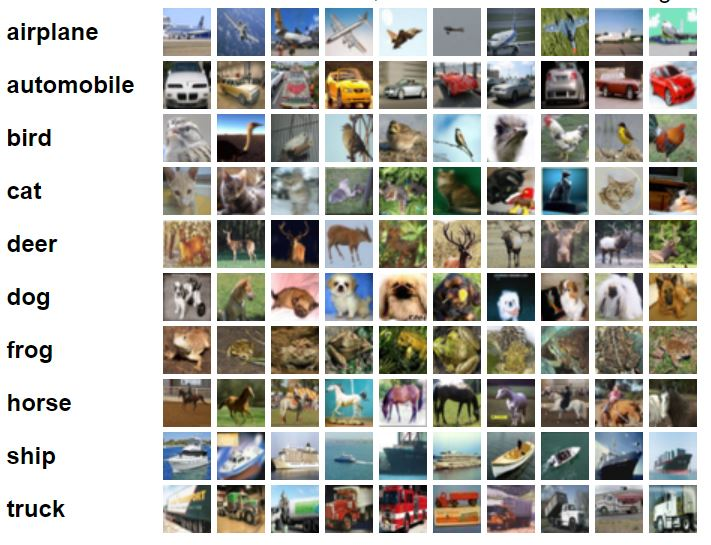

In [51]:
from IPython.display import Image
Image(filename='small_images.jpg') 

# Importing Libraries

In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Getting Training And Test Set

In [8]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

170508288/170498071 [==============================] - 72s 0us/step


In [10]:
X_train.shape

(50000, 32, 32, 3)

In [12]:
y_train = y_train.reshape(-1,)

In [46]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [13]:
X_train = X_train/255
X_test = X_test/255

# Artificial Neural Network 

In [27]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Flatten(input_shape=(32,32,3)))
ann.add(tf.keras.layers.Dense(3000, activation='relu'))
ann.add(tf.keras.layers.Dense(3000, activation='relu'))
ann.add(tf.keras.layers.Dense(10, activation='sigmoid'))


ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
ann.fit(X_train, y_train, epochs = 5)


Epoch 1/5
1563/1563 [==============================] - 141s 90ms/step - loss: 1.8056 - accuracy: 0.3559
Epoch 2/5
1563/1563 [==============================] - 143s 91ms/step - loss: 1.6187 - accuracy: 0.4290
Epoch 3/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.5357 - accuracy: 0.4587
Epoch 4/5
1563/1563 [==============================] - 142s 91ms/step - loss: 1.4765 - accuracy: 0.4806
Epoch 5/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.4292 - accuracy: 0.4968


In [28]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 10s 30ms/step - loss: 1.4638 - accuracy: 0.4769


[1.46378493309021, 0.47690001130104065]

We got an accuracy of about 47 percent on the test set

# Convoluted Neural Network

In [40]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding="same", activation="relu"))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dense(10, activation='softmax'))
cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
cnn.fit(X_train,y_train,epochs = 5)


Epoch 1/5
1563/1563 [==============================] - 59s 36ms/step - loss: 1.5134 - accuracy: 0.45441s - loss: 1.5218 - 
Epoch 2/5
1563/1563 [==============================] - 56s 36ms/step - loss: 1.1396 - accuracy: 0.5970
Epoch 3/5
1563/1563 [==============================] - 63s 41ms/step - loss: 1.0100 - accuracy: 0.6472
Epoch 4/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9330 - accuracy: 0.6758
Epoch 5/5
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8760 - accuracy: 0.6953


In [41]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 1.0040 - accuracy: 0.6552


[1.0040465593338013, 0.6552000045776367]

We got an accuracy of about 65 percent in 5 epochs

In [42]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.0981902e-02, 2.7611363e-03, 2.4302495e-03, 3.5311237e-01,
        7.2036926e-03, 4.1210866e-01, 2.0612064e-03, 1.9280480e-02,
        1.7321758e-01, 6.8426686e-03],
       [1.0229662e-02, 2.8659019e-01, 2.4775492e-05, 1.2718580e-05,
        2.4137291e-06, 4.2197717e-06, 1.0420128e-05, 3.4619750e-06,
        6.9845080e-01, 4.6712942e-03],
       [1.2597550e-01, 1.7976546e-01, 5.6523979e-03, 1.0400766e-02,
        1.3037308e-03, 2.8907643e-03, 4.0969093e-04, 1.1654836e-02,
        5.0141293e-01, 1.6053401e-01],
       [4.0621617e-01, 5.8906741e-02, 4.9206913e-03, 3.3657701e-04,
        5.7412265e-04, 2.8621705e-05, 6.6381705e-05, 1.3459865e-04,
        5.2260762e-01, 6.2084422e-03],
       [5.2838652e-05, 5.3492124e-04, 7.5576515e-03, 1.1668085e-01,
        3.7107125e-01, 4.0370815e-02, 4.6033019e-01, 1.4518530e-04,
        3.1392956e-03, 1.1707718e-04]], dtype=float32)

In [43]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[5, 8, 8, 8, 6]

In [44]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

Comparing both the arrays, we can say that we got 3/5 predictions right

In [48]:
y_test = y_test.reshape(-1,)

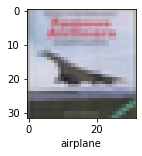

In [49]:
plot_sample(X_test, y_test,3)

In [50]:
classes[y_classes[3]]

'ship'

The ship was rightly predicted by our CNN